## Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install imbalanced-learn

## Load data

In [4]:
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99],
    flip_y=0,
    random_state=1)

X[:5]

array([[0.22201371, 0.54020654],
       [1.34743875, 1.41282352],
       [0.53723817, 0.37273043],
       [2.13446179, 1.40481867],
       [2.31582718, 1.35685798]])

In [6]:
y[:5]

array([0, 0, 0, 0, 0])

In [7]:
df      = pd.DataFrame(data=X)
df['y'] = y
df.head()

,0,1,y
0,0.222014,0.540207,0
1,1.347439,1.412824,0
2,0.537238,0.372730,0
3,2.134462,1.404819,0
4,2.315827,1.356858,0


In [8]:
df.y.value_counts()

0    9900
1     100
Name: y, dtype: int64

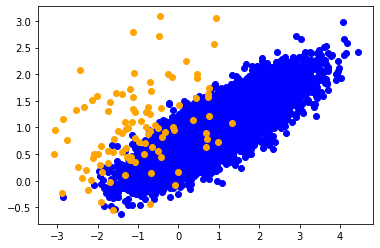

In [9]:
df0 = df[df.y == 0]
df1 = df[df.y == 1]

plt.scatter(df0[0], df0[1], color='blue')
plt.scatter(df1[0], df1[1], color='orange')

## Up sampling

In [10]:
from sklearn.utils import resample

In [11]:
df0 = df[df.y == 0]
df1 = df[df.y == 1]

df1_up = resample(
  df1,
  replace=True,
  n_samples=len(df0),
  random_state=0
)

df_up = pd.concat([df0, df1_up])
df_up.y.value_counts()

1    9900
0    9900
Name: y, dtype: int64

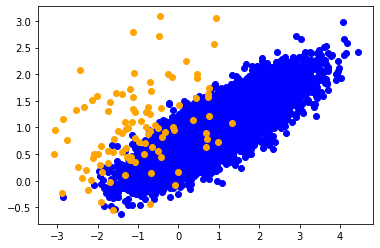

In [12]:
df0 = df[df.y == 0]
df1 = df[df.y == 1]

plt.scatter(df0[0], df0[1], color='blue')
plt.scatter(df1[0], df1[1], color='orange')

## SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smote      = SMOTE()
X_up, y_up = smote.fit_resample(df.drop('y', axis=1), df.y)

In [15]:
df_up      = pd.DataFrame(data=X_up)
df_up['y'] = y_up
df_up.y.value_counts()

1    9900
0    9900
Name: y, dtype: int64

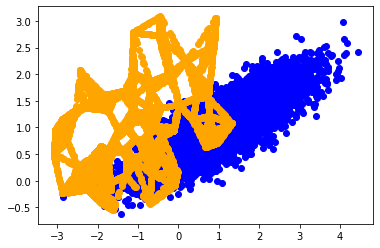

In [16]:
df0 = df_up[df_up.y == 0]
df1 = df_up[df_up.y == 1]

plt.scatter(df0[0], df0[1], color='blue')
plt.scatter(df1[0], df1[1], color='orange')

## Down sampling

In [17]:
df0 = df[df.y == 0]
df1 = df[df.y == 1]

df0_down = resample(
  df0,
  replace=False,
  n_samples=len(df1),
  random_state=0
)

df_down = pd.concat([df0_down, df1])
df_down.y.value_counts()

1    100
0    100
Name: y, dtype: int64

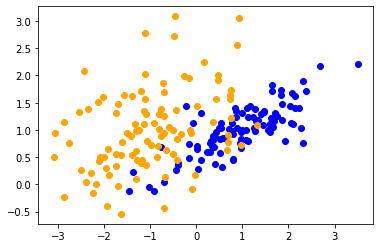

In [18]:
df0 = df_down[df_down.y == 0]
df1 = df_down[df_down.y == 1]

plt.scatter(df0[0], df0[1], color='blue')
plt.scatter(df1[0], df1[1], color='orange')

## Near Miss

In [19]:
from imblearn.under_sampling import NearMiss

In [20]:
nm = NearMiss(n_neighbors=5)
X_down, y_down = nm.fit_resample(df.drop('y', axis=1), df.y)

In [21]:
df_down      = pd.DataFrame(data=X_down)
df_down['y'] = y_down
df_down.y.value_counts()

1    100
0    100
Name: y, dtype: int64

(-3.47, 4.82)

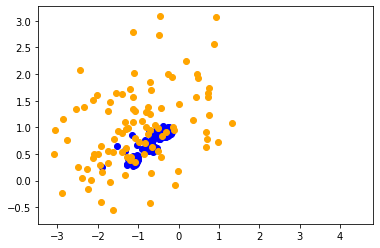

In [22]:
df0 = df_down[df_down.y == 0]
df1 = df_down[df_down.y == 1]

plt.scatter(df0[0], df0[1], color='blue')
plt.scatter(df1[0], df1[1], color='orange')

plt.ylim((-0.81, 3.27))
plt.xlim((-3.47, 4.82))

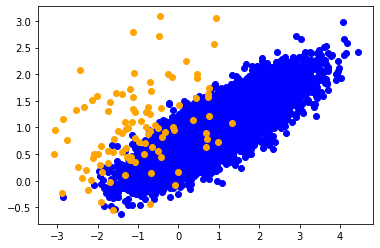

In [23]:
df0 = df[df.y == 0]
df1 = df[df.y == 1]

plt.scatter(df0[0], df0[1], color='blue')
plt.scatter(df1[0], df1[1], color='orange')

## ClusterCentroids

In [24]:
from imblearn.under_sampling import ClusterCentroids

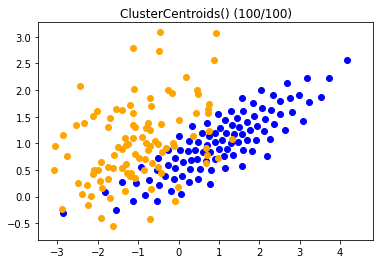

In [25]:
X = df.drop('y', axis=1)
y = df.y

_object = ClusterCentroids()
_X, _y  = _object.fit_resample(X, y)

# Plot
X0 = _X[_y == 0]
X1 = _X[_y == 1]

plt.scatter(X0[0], X0[1], color='blue')
plt.scatter(X1[0], X1[1], color='orange')

plt.ylim((-0.81, 3.27))
plt.xlim((-3.47, 4.82))
plt.title('{:s} ({:d}/{:d})'.format(str(_object), len(X0), len(X1)))
plt.show()

## Combining over & under sampling

In [26]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE

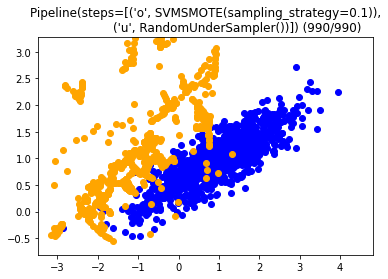

In [27]:
pipeline = Pipeline(steps=[
    ('o', SVMSMOTE(sampling_strategy=0.1)),   # over-sampling 10%
    ('u', RandomUnderSampler())               # under-sampling
])
_X, _y = pipeline.fit_resample(X,y)

# Plot
X0 = _X[_y == 0]
X1 = _X[_y == 1]

plt.scatter(X0[0], X0[1], color='blue')
plt.scatter(X1[0], X1[1], color='orange')

plt.ylim((-0.81, 3.27))
plt.xlim((-3.47, 4.82))
plt.title('{:s} ({:d}/{:d})'.format(str(pipeline), len(X0), len(X1)))
plt.show()